### Plot Time Complexity of Matrix Multiplication Methods

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import subprocess

In [2]:
compiled_dir = f'..{os.sep}compiled'
plot_dir = f'..{os.sep}plots'

In [3]:
program_base_name = f'{compiled_dir}{os.sep}exercise_3'

In [4]:
opt_flags = ['O0', 'O1', 'O2', 'O3', 'Os', 'Ofast']

In [5]:
opt_flag_descriptors = [
    'Without optimization',
    'With O1 optimization',
    'With O2 optimization',
    'With O3 optimization',
    'With Os optimization',
    'With Ofast optimization'
]

In [6]:
plot_names = [f'{plot_dir}{os.sep}matmul_run_times_{opt}.pdf' for opt in opt_flags]

In [7]:
mat_sizes = np.array([10, 50, 100, 250, 500, 750, 1000])

In [8]:
run_times = np.zeros((len(opt_flags), 3, len(mat_sizes)))

Run each program with different input matrix sizes.

In [9]:
for i, flag in enumerate(opt_flags):
    for j, mat_dim in enumerate(mat_sizes):
        output = subprocess.run(
            [f'{program_base_name}_{flag}'],
            stdout=subprocess.PIPE,
            input="{}\n{}\n{}\n{}\n".format(mat_dim, mat_dim, mat_dim, mat_dim),
            encoding="ascii"
        )

        lines = output.stdout.split('\n')
        run_times[i, :, j] = [float(t) for t in lines[:3]]

Plot the results.

/var/folders/29/57ctygt16nb459fzj64lth0r0000gq/T/ipykernel_54754/1094921757.py:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(mat_sizes, np.log(run_times[i, 1]), 'o-', label='Custom 2')
/var/folders/29/57ctygt16nb459fzj64lth0r0000gq/T/ipykernel_54754/1094921757.py:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(mat_sizes, np.log(run_times[i, 1]), 'o-', label='Custom 2')


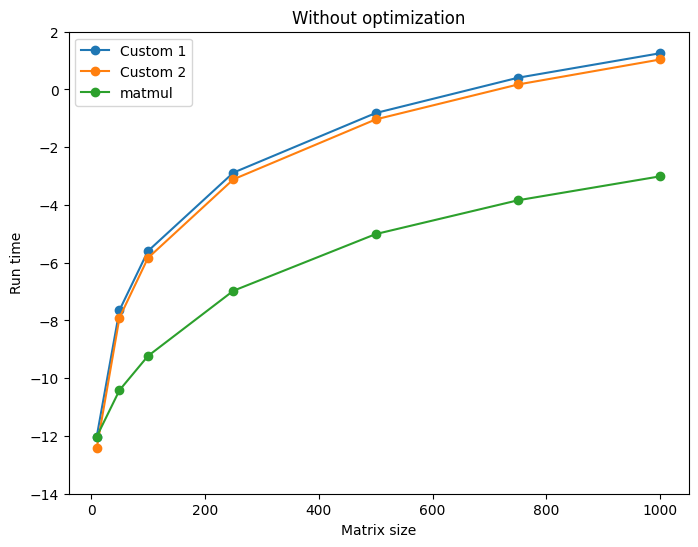

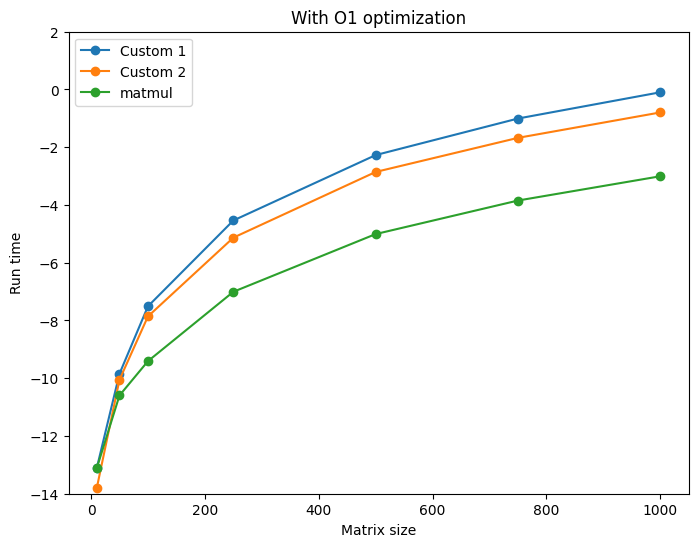

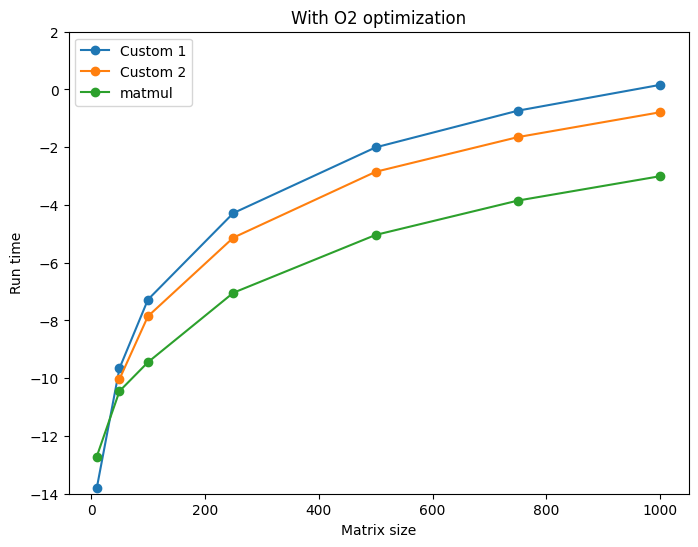

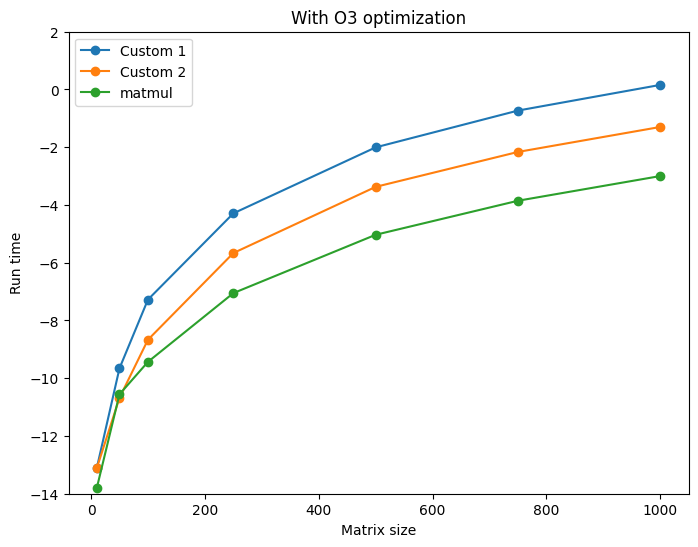

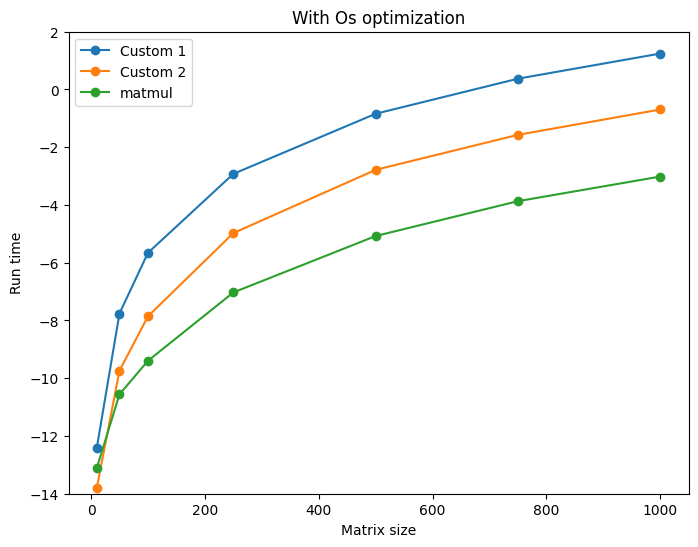

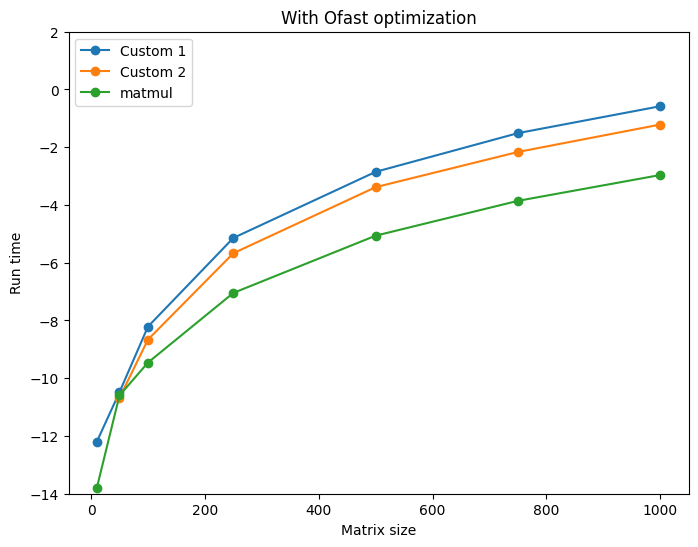

In [10]:
for i in range(len(opt_flags)):
    plt.figure(figsize=(8, 6))
    plt.plot(mat_sizes, np.log(run_times[i, 0]), 'o-', label='Custom 1')
    plt.plot(mat_sizes, np.log(run_times[i, 1]), 'o-', label='Custom 2')
    plt.plot(mat_sizes, np.log(run_times[i, 2]), 'o-', label='matmul')
    plt.title(opt_flag_descriptors[i])
    plt.xlabel('Matrix size')
    plt.ylabel('Run time')
    plt.ylim([-14, 2])
    plt.legend(loc='upper left')
    plt.savefig(plot_names[i], format="pdf", bbox_inches="tight");